In [54]:
import pandas as pd
import yfinance as yf
import importlib
from pca_dax import data_handler as dh
from pca_dax import db

In [25]:
dax = pd.read_html('https://en.wikipedia.org/wiki/DAX'
             , attrs={'id': 'constituents'})[0]['Ticker'].to_list()

In [17]:
mdax = pd.read_html('https://en.wikipedia.org/wiki/MDAX'
             , attrs={'id': 'constituents'})[0]['Symbol'].to_list() 

In [18]:
sdax = pd.read_html('https://en.wikipedia.org/wiki/SDAX'
             , attrs={'id': 'constituents'})[0]['Symbol'].to_list()

In [32]:
[x + '.DE' for x in set(sum([dax, mdax, sdax], [])) if '.DE' not in x]

['TC1.DE',
 'QH9.DE',
 'SKB.DE',
 'EVD.DE',
 'KBX.DE',
 'DRW3.DE',
 'PUM.DE',
 'CWC.DE',
 'SZG.DE',
 'PSM.DE',
 'SAX.DE',
 'VOS.DE',
 'NDX1.DE',
 'BDT.DE',
 'AT1.DE',
 'BVB.DE',
 'DUE.DE',
 'LXS.DE',
 'HLE.DE',
 'AAD.DE',
 'INS.DE',
 'WAF.DE',
 'SANT.DE',
 'TLX.DE',
 'BYW6.DE',
 'DMP.DE',
 'TKA.DE',
 'STM.DE',
 'CEC.DE',
 'PBB.DE',
 'LPK.DE',
 'WUW.DE',
 'O2D.DE',
 'SDF.DE',
 'WCH.DE',
 'JST.DE',
 'HBM.DE',
 'HYQ.DE',
 'UTDI.DE',
 'DEQ.DE',
 'EVK.DE',
 'JEN.DE',
 'EVT.DE',
 '8TRA.DE',
 'NDA.DE',
 'SNH.DE',
 'SFQ.DE',
 'ECV.DE',
 'PFV.DE',
 'HFG.DE',
 'SIX2.DE',
 'RAA.DE',
 'RRTL.DE',
 'DIC.DE',
 'CBK.DE',
 'TEG.DE',
 'BC8.DE',
 'FIE.DE',
 'GIL.DE',
 'DBAN.DE',
 'FRA.DE',
 'NWO.DE',
 'HABA.DE',
 'FPE3.DE',
 'SAE.DE',
 'VTWR.DE',
 'SOW.DE',
 'TIMA.DE',
 'WSU.DE',
 'BFSA.DE',
 'HNL.DE',
 'RHM.DE',
 'ZO1.DE',
 'NEM.DE',
 'NA9.DE',
 'AFX.DE',
 'SBS.DE',
 'FNTN.DE',
 'LHA.DE',
 'JUN3.DE',
 'GXI.DE',
 'LEG.DE',
 'CCAP.DE',
 'LEO.DE',
 'PAT.DE',
 'SHA.DE',
 'INH.DE',
 'AOF.DE',
 'ADV.DE',
 'DE

In [37]:
tickers = set([x + '.DE' for x in sum([dax, mdax, sdax], []) if '.DE' not in x])

In [39]:
yf.download(tickers=tickers, start='2023-11-01')['Adj Close']

[*********************100%%**********************]  114 of 114 completed


7 Failed downloads:
['TC1.DE', 'SNH.DE', 'SAE.DE', 'LEO.DE', 'VTWR.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ZO1.DE', 'HBM.DE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-11-01 -> 2023-11-17)')


,1U1.DE,8TRA.DE,AAD.DE,ADJ.DE,ADV.DE,AFX.DE,AIXA.DE,AOF.DE,AT1.DE,BC8.DE,...,UTDI.DE,VBK.DE,VOS.DE,VTWR.DE,WAC.DE,WAF.DE,WCH.DE,WSU.DE,WUW.DE,ZO1.DE
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-01 00:00:00,16.139999,18.450001,110.400002,0.4160,19.940001,80.099998,26.020000,204.0,2.131,42.330002,...,19.770000,30.590000,37.099998,NaN,17.200001,79.500000,110.050003,30.000000,13.04,NaN
2023-11-02 00:00:00,16.379999,18.709999,112.599998,0.4252,19.920000,82.459999,27.120001,205.0,2.238,42.810001,...,19.620001,32.290001,37.650002,NaN,17.780001,83.250000,114.949997,31.700001,13.20,NaN
2023-11-03 00:00:00,16.459999,19.030001,114.599998,0.4002,20.000000,84.820000,27.740000,209.0,2.334,43.439999,...,19.770000,32.349998,37.849998,NaN,18.299999,85.199997,116.150002,32.000000,13.16,NaN
2023-11-06 00:00:00,16.420000,18.950001,113.400002,0.4022,19.980000,84.120003,27.980000,209.0,2.036,42.779999,...,20.059999,31.500000,38.049999,NaN,17.940001,85.199997,117.150002,33.400002,13.12,NaN
2023-11-07 00:00:00,17.059999,18.580000,114.400002,0.4010,19.920000,83.699997,27.730000,211.5,2.179,43.529999,...,20.940001,30.309999,37.650002,NaN,17.900000,84.199997,116.050003,32.549999,13.20,NaN
2023-11-08 00:00:00,16.840000,18.920000,116.199997,0.4090,19.860001,84.940002,27.920000,214.0,2.065,44.619999,...,20.299999,30.090000,38.400002,NaN,18.059999,83.500000,117.849998,32.799999,13.16,NaN
2023-11-09 00:00:00,16.760000,18.940001,115.400002,0.4012,19.760000,85.919998,28.129999,215.0,2.130,45.450001,...,20.420000,33.790001,39.000000,NaN,17.620001,85.849998,122.199997,32.700001,13.20,NaN
2023-11-10 00:00:00,16.240000,18.680000,114.599998,0.4082,19.799999,84.519997,28.040001,216.0,2.037,43.099998,...,18.940001,34.490002,38.849998,NaN,17.080000,83.849998,119.050003,32.599998,13.12,NaN
2023-11-13 00:00:00,16.340000,18.650000,113.199997,0.4000,19.940001,81.260002,28.010000,217.0,2.042,44.770000,...,19.799999,35.060001,39.099998,NaN,17.180000,83.849998,118.599998,32.200001,13.20,NaN


In [43]:
from pca_dax import yfinance_info as yfi

tckr = yfi.Ticker('SAP.DE')
tckr.info['sector']

'Technology'

In [50]:
info = tckr.info

In [52]:
info

{'address1': 'Dietmar-Hopp-Allee 16',
 'city': 'Walldorf',
 'zip': '69190',
 'country': 'Germany',
 'phone': '49 6227 7 47474',
 'fax': '49 6227 7 57575',
 'website': 'https://www.sap.com',
 'industry': 'Software - Application',
 'industryKey': 'software-application',
 'industryDisp': 'Software - Application',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "SAP SE, together with its subsidiaries, provides enterprise application software products worldwide. The company operates through Applications, Technology & Services; Qualtrics; Business Network; and Sustainability segments. It offers SAP S/4HANA that offers software capabilities for finance, risk and project management, procurement, manufacturing, supply chain and asset management, and research and development; SAP SuccessFactors solutions for human resources, including HR and payroll, talent and employee experience management, and people and workforce analytics; spend mana

In [53]:
info_list = ['symbol', 'shortName', 'exchange', 'industry', 'sector', 'marketCap', 'bookValue', 'beta']

res = {key: info[key] for key in info_list if key in info}

print(res)

{'symbol': 'SAP.DE', 'shortName': 'SAP SE O.N.', 'exchange': 'GER', 'industry': 'Software - Application', 'sector': 'Technology', 'marketCap': 160506232832, 'bookValue': 36.78, 'beta': 0.956}


In [59]:
list_res = [res]
pd.DataFrame(list_res)

,symbol,shortName,exchange,industry,sector,marketCap,bookValue,beta
0,SAP.DE,SAP SE O.N.,GER,Software - Application,Technology,160506232832,36.78,0.956


In [61]:
two_stocks = yf.download(['SAP.DE', 'DBAN.DE'], start='2023-11-01')

[*********************100%%**********************]  2 of 2 completed


In [92]:
two_stocks.columns.levels[1].to_list()

['DBAN.DE', 'SAP.DE']

In [108]:
two_stocks.stack().reset_index(names=['Date', 'Symbol'])

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2023-11-01,DBAN.DE,28.100000,28.100000,28.350000,27.600000,28.150000,11649
1,2023-11-01,SAP.DE,127.820000,127.820000,128.320007,126.099998,127.099998,1122663
2,2023-11-02,DBAN.DE,28.600000,28.600000,29.100000,28.200001,28.200001,8706
3,2023-11-02,SAP.DE,130.119995,130.119995,130.839996,128.279999,128.479996,1857108
4,2023-11-03,DBAN.DE,28.750000,28.750000,29.200001,28.500000,28.700001,9358
5,2023-11-03,SAP.DE,129.279999,129.279999,129.899994,128.179993,129.479996,1791555
6,2023-11-06,DBAN.DE,28.100000,28.100000,28.900000,27.950001,28.900000,7966
7,2023-11-06,SAP.DE,128.720001,128.720001,129.300003,128.419998,128.979996,1106875
8,2023-11-07,DBAN.DE,27.799999,27.799999,28.100000,27.450001,28.100000,9990
9,2023-11-07,SAP.DE,131.759995,131.759995,132.380005,128.779999,129.000000,1574112


In [104]:
two_stocks

Adj Close                  Close                   High  \
              DBAN.DE      SAP.DE    DBAN.DE      SAP.DE    DBAN.DE   
Date                                                                  
2023-11-01  28.100000  127.820000  28.100000  127.820000  28.350000   
2023-11-02  28.600000  130.119995  28.600000  130.119995  29.100000   
2023-11-03  28.750000  129.279999  28.750000  129.279999  29.200001   
2023-11-06  28.100000  128.720001  28.100000  128.720001  28.900000   
2023-11-07  27.799999  131.759995  27.799999  131.759995  28.100000   
2023-11-08  28.299999  133.179993  28.299999  133.179993  28.600000   
2023-11-09  28.500000  134.720001  28.500000  134.720001  28.600000   
2023-11-10  28.799999  134.860001  28.799999  134.860001  29.049999   
2023-11-13  29.000000  135.419998  29.000000  135.419998  29.000000   
2023-11-14  29.549999  136.259995  29.549999  136.259995  29.799999   
2023-11-15  29.350000  137.259995  29.350000  137.259995  29.700001   
2023-11-16  29.100000  136.440002  29.100000  136.440002  29.400000   
2023-11-17  28.900000  137.220001  28.900000  137.220001  29.650000   

                              Low                   Open              Volume  \
                SAP.DE    DBAN.DE      SAP.DE    DBAN.DE      SAP.DE DBAN.DE   
Date                                                                           
2023-11-01  128.320007  27.600000  126.099998  28.150000  127.099998   11649   
2023-11-02  130.839996  28.200001  128.279999  28.200001  128.479996    8706   
2023-11-03  129.899994  28.500000  128.179993  28.700001  129.479996    9358   
2023-11-06  129.300003  27.950001  128.419998  28.900000  128.979996    7966   
2023-11-07  132.380005  27.450001  128.779999  28.100000  129.000000    9990   
2023-11-08  133.179993  27.299999  130.860001  27.650000  131.259995    9635   
2023-11-09  134.720001  28.250000  132.240005  28.299999  132.520004   11438   
2023-11-10  135.119995  28.700001  133.600006  28.700001  133.899994   15418   
2023-11-13  135.419998  28.350000  134.360001  29.000000  134.839996   14071   
2023-11-14  137.320007  28.650000  134.500000  29.049999  135.119995   11579   
2023-11-15  137.259995  28.700001  135.220001  29.450001  135.619995   27229   
2023-11-16  137.500000  28.799999  136.440002  29.400000  136.679993   20012   
2023-11-17  137.759995  28.750000  136.559998  29.250000  136.639999   15094   

                     
             SAP.DE  
Date                 
2023-11-01  1122663  
2023-11-02  1857108  
2023-11-03  1791555  
2023-11-06  1106875  
2023-11-07  1574112  
2023-11-08  1951854  
2023-11-09  1364065  
2023-11-10  1372330  
2023-11-13  1305444  
2023-11-14  2062327  
2023-11-15  1470265  
2023-11-16  1428457  
2023-11-17  1853622

In [93]:
two_stocks_wo_index = two_stocks.reset_index()

pd.melt(
    two_stocks_wo_index
    , id_vars=[two_stocks.columns.levels[1].to_list()]
    , value_vars=two_stocks.columns.levels[0].to_list()
    , ignore_index=False
)

TypeError: unhashable type: 'list'

In [114]:
two_stocks_wo_index['Date'][0].date()

datetime.date(2023, 11, 1)

In [112]:
import time

col_list = ['symbol', 'shortName', 'exchange', 'industry', 'sector', 'marketCap', 'bookValue', 'beta']
results = []
tickers = ['SAP.DE', 'DBAN.DE']

for i, ticker in enumerate(tickers):
    symbol = yfi.Ticker(ticker)
    info = symbol.info

    results.append({key: info[key] if key in info else None for key in col_list})

    time.sleep(1)
    
pd.DataFrame(results)

,symbol,shortName,exchange,industry,sector,marketCap,bookValue,beta
0,SAP.DE,SAP SE O.N.,GER,Software - Application,Technology,160506232832,36.780,0.956
1,DBAN.DE,DT.BETEILIG.AG NA O.N.,GER,Asset Management,Financial Services,543464512,36.111,1.161


In [115]:
from pca_dax import data_handler as dh

df = dh.DataHandler(
    start_date='2023-11-01'
)

df.fetch_stocks_from_api()

[*********************100%%**********************]  114 of 114 completed



7 Failed downloads:
['TC1.DE', 'SNH.DE', 'SAE.DE', 'LEO.DE', 'VTWR.DE']: Exception('%ticker%: No timezone found, symbol may be delisted')
['ZO1.DE', 'HBM.DE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-11-01 -> 2023-11-18)')


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2023-11-01,1U1.DE,16.139999,16.139999,16.340000,16.100000,16.340000,33982.0
1,2023-11-01,8TRA.DE,18.450001,18.450001,18.830000,18.330000,18.740000,64825.0
2,2023-11-01,AAD.DE,110.400002,110.400002,111.800003,108.800003,109.800003,5012.0
3,2023-11-01,ADJ.DE,0.416000,0.416000,0.420000,0.416000,0.419800,29874.0
4,2023-11-01,ADV.DE,19.940001,19.940001,19.959999,19.920000,19.920000,15123.0
...,...,...,...,...,...,...,...,...
1386,2023-11-17,WAC.DE,17.860001,17.860001,17.940001,17.459999,17.459999,31776.0
1387,2023-11-17,WAF.DE,86.150002,86.150002,87.099998,85.000000,86.000000,31867.0
1388,2023-11-17,WCH.DE,120.800003,120.800003,122.050003,118.800003,119.150002,113120.0
1389,2023-11-17,WSU.DE,33.799999,33.799999,34.099998,33.599998,33.900002,5244.0


In [61]:
import pca_dax

importlib.reload(pca_dax.data_handler)

data = dh.DataHandler(
    start_date='2023-11-01'
)

df = data.fetch_stocks_from_db()

df.head()

,1COV.DE,1U1.DE,8TRA.DE,AAD.DE,ADJ.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,AIXA.DE,...,VBK.DE,VNA.DE,VOS.DE,VOW3.DE,WAC.DE,WAF.DE,WCH.DE,WSU.DE,WUW.DE,ZAL.DE
date,,,,,,,,,,,,,,,,,,,,,
2023-11-01,47.549999,16.139999,18.450001,110.400002,0.4160,167.000000,19.940001,80.099998,127.959999,26.020000,...,30.590000,21.910000,37.099998,99.790001,17.200001,79.500000,110.050003,30.000000,13.04,22.260000
2023-11-02,47.450001,16.379999,18.709999,112.599998,0.4252,171.179993,19.920000,82.459999,129.139999,27.120001,...,32.290001,22.740000,37.650002,102.980003,17.780001,83.250000,114.949997,31.700001,13.20,20.860001
2023-11-03,47.540001,16.459999,19.030001,114.599998,0.4002,170.479996,20.000000,84.820000,129.039993,27.740000,...,32.349998,24.510000,37.849998,105.040001,18.299999,85.199997,116.150002,32.000000,13.16,22.500000
2023-11-06,46.889999,16.420000,18.950001,113.400002,0.4022,172.000000,19.980000,84.120003,128.419998,27.980000,...,31.500000,23.180000,38.049999,105.059998,17.940001,85.199997,117.150002,33.400002,13.12,22.490000
2023-11-07,47.220001,17.059999,18.580000,114.400002,0.4010,171.880005,19.920000,83.699997,129.220001,27.730000,...,30.309999,23.709999,37.650002,104.199997,17.900000,84.199997,116.050003,32.549999,13.20,22.709999


In [55]:
dax = pd.read_html(
    'https://en.wikipedia.org/wiki/DAX'
    , attrs={'id': 'constituents'}
)[0]['Ticker'].to_list()

mdax = pd.read_html(
    'https://en.wikipedia.org/wiki/MDAX'
    , attrs={'id': 'constituents'}
)[0]['Symbol'].to_list()

sdax = pd.read_html(
    'https://en.wikipedia.org/wiki/SDAX'
    , attrs={'id': 'constituents'}
)[0]['Symbol'].to_list()

tickers = set([x + '.DE' if '.DE' not in x else x for x in sum([dax, mdax, sdax], [])])

In [56]:
with db.create_connection() as conn:
    df_info = pd.read_sql(
        f"""
            SELECT *
            FROM companies
            WHERE symbol IN {tuple(tickers)}
        """
        , con=conn
    )

In [57]:
df_info

,id,symbol,name,exchange,industry,sector,market_cap,book_value,beta
0,67,1COV.DE,COVESTRO AG O.N.,GER,Specialty Chemicals,Basic Materials,9.059521e+09,37.321,1.369
1,5,1U1.DE,1+1 AG INH O.N.,GER,Telecom Services,Communication Services,2.827852e+09,33.043,0.512
2,68,8TRA.DE,TRATON SE INH O.N.,GER,Farm & Heavy Construction Machinery,Industrials,9.510001e+09,32.178,1.723
3,75,AAD.DE,AMADEUS FIRE AG,GER,Staffing & Employment Services,Industrials,6.873108e+08,24.633,1.733
4,19,ADJ.DE,ADLER GROUP S.A. NPV,GER,Real Estate Services,Real Estate,6.067039e+07,2.958,1.547
...,...,...,...,...,...,...,...,...,...
145,89,WCH.DE,WACKER CHEMIE O.N.,GER,Specialty Chemicals,Basic Materials,7.925725e+09,89.581,1.355
146,91,WSU.DE,WASHTEC AG O.N.,GER,Specialty Industrial Machinery,Industrials,4.523217e+08,5.666,0.848
147,112,WUW.DE,WUESTENROT+WUERTT.AG O.N.,GER,Insurance - Life,Financial Services,1.263280e+09,52.749,0.832
148,56,ZAL.DE,ZALANDO SE,GER,Internet Retail,Consumer Cyclical,5.971940e+09,8.795,1.798


In [59]:
importlib.reload(pca_dax.data_handler)

info_df = data.fetch_info_from_db()

info_df

In [63]:
df.isna().any().any()

False

In [70]:
importlib.reload(pca_dax.data_handler)

df = dh.DataHandler(start_date='2023-01-01'
).fetch_stocks_from_db(format='long')

In [71]:
df

,symbol,adj_close
date,,
2023-01-02,1COV.DE,38.259998
2023-01-03,1COV.DE,39.580002
2023-01-04,1COV.DE,41.470001
2023-01-05,1COV.DE,41.709999
2023-01-06,1COV.DE,42.369999
...,...,...
2023-11-13,ZAL.DE,21.170000
2023-11-14,ZAL.DE,23.410000
2023-11-15,ZAL.DE,24.129999


<Axes: xlabel='date', ylabel='SAP.DE'>

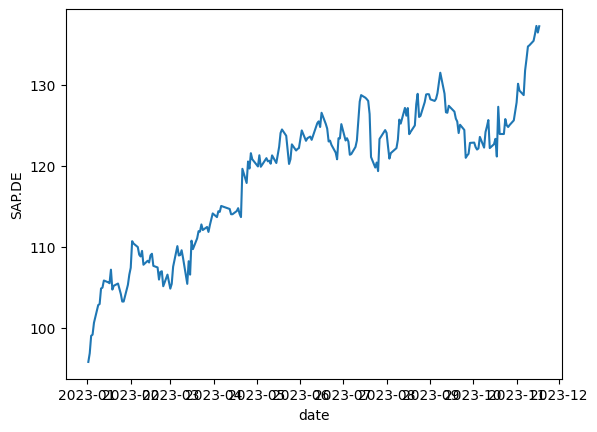

In [68]:
import seaborn as sns

sns.lineplot(data=df, x=df.index, y='SAP.DE')

In [74]:
df = dh.DataHandler(
            start_date='2023-01-01'
        ).fetch_stocks_from_db(format='long', price_type='open, high, low, close')

In [75]:
selected_stock = ['SAP.DE']

df[df.symbol.isin(selected_stock)]

,symbol,open,high,low,close
date,,,,,
2023-01-02,SAP.DE,97.169998,97.540001,96.440002,97.419998
2023-01-03,SAP.DE,97.339996,99.199997,97.099998,98.510002
2023-01-04,SAP.DE,98.800003,101.099998,98.599998,100.699997
2023-01-05,SAP.DE,100.139999,101.940002,100.139999,100.839996
2023-01-06,SAP.DE,100.680000,102.339996,100.220001,102.339996
...,...,...,...,...,...
2023-11-13,SAP.DE,134.839996,135.419998,134.360001,135.419998
2023-11-14,SAP.DE,135.119995,137.320007,134.500000,136.259995
2023-11-15,SAP.DE,135.619995,137.259995,135.220001,137.259995
